In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\preulloguerpertrimestreibarri.csv')

In [3]:
# comprobo si hi ha elements duplicats:
len(df)

584

In [4]:
dfclean = df.drop_duplicates()
if len(dfclean) == len(df):
    print("no hi ha elements duplicats")
else:
    print("hi ha elements duplicats")

no hi ha elements duplicats


In [5]:
df.info()
# com podem veure el preu no està com a xifra numérica sino com a objecte.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [6]:
df['Lloguer_mitja'].value_counts()

# també podem veure que la columna de lloguer mitjà té lloguer mitjà d'euros al mes
# i lloguer mitja Euros/m2 mes. Crearé un Df per cada tipus de lloguer i després 
# crearé un de sol però separaré per columnes cadascú i els seus valors


Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: Lloguer_mitja, dtype: int64

In [7]:
df_LloguerMitjaMensual = df.drop(df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'].index)
# ara convertiré els valors de preu en números, incloc la sentència errors='coerce' perque hi ha valors que són
# símbols.
df_LloguerMitjaMensual['Preu'] = pd.to_numeric(df_LloguerMitjaMensual['Preu'], errors='coerce')
# mostro les cinc primeres files:
df_LloguerMitjaMensual.head(5)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [8]:
df_LloguerMitjaPerSuperficie = df.drop(df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].index)
# converteixo el preu en valors numèrics:
df_LloguerMitjaPerSuperficie['Preu'] = pd.to_numeric(df_LloguerMitjaPerSuperficie['Preu'], errors='coerce')
# canvio el tipos de lloguer i el preu perquè a l'altre DataFrame està repetit
df_LloguerMitjaPerSuperficie.rename(columns = {'Lloguer_mitja' : 'Lloguer_Mitja_Per_Superficie', 'Preu' : 'Preu_per_Superficie'}, inplace = True )
# mostro les cinc primeres files:
df_LloguerMitjaPerSuperficie.head(5)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_Mitja_Per_Superficie,Preu_per_Superficie
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9


In [9]:
# per tenir el df complet utilitzo la funció merge
df_lloguer_complet = pd.merge(df_LloguerMitjaPerSuperficie, df_LloguerMitjaMensual )
df_lloguer_complet.head(5)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_Mitja_Per_Superficie,Preu_per_Superficie,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3,Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9,Lloguer mitjà mensual (Euros/mes),918.0


# Exercici 1
Crea almenys una visualització per: una variable categòrica (Districte o barri)

AxesSubplot(0.413158,0.125;0.198684x0.755)


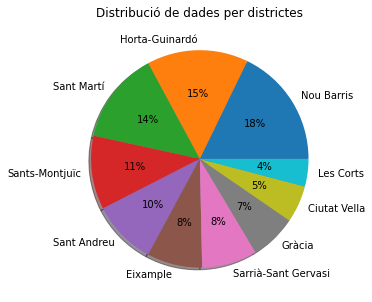

In [10]:
PiePlotDistrictes = df_LloguerMitjaMensual['Nom_Districte'].value_counts().plot.pie(
    figsize=(19,5),
    title="Distribució de dades per districtes",
    ylabel='',
    shadow = True,
    autopct='%1.0f%%'
    )
print(PiePlotDistrictes)
# Exercici 2 exporto gràfic com a imatge
plt.savefig("pieplot.jpg")


Una variable numérica (Preu)

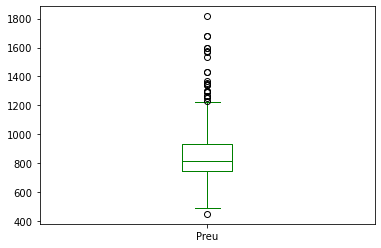

In [11]:
df_LloguerMitjaMensual["Preu"].plot.box(
    color="green",
)
# Exercici 2 exporto gràfic com a imatge
plt.savefig("cuartil.jpg")

Una variable numérica i una categòrica (Districte i Preu)

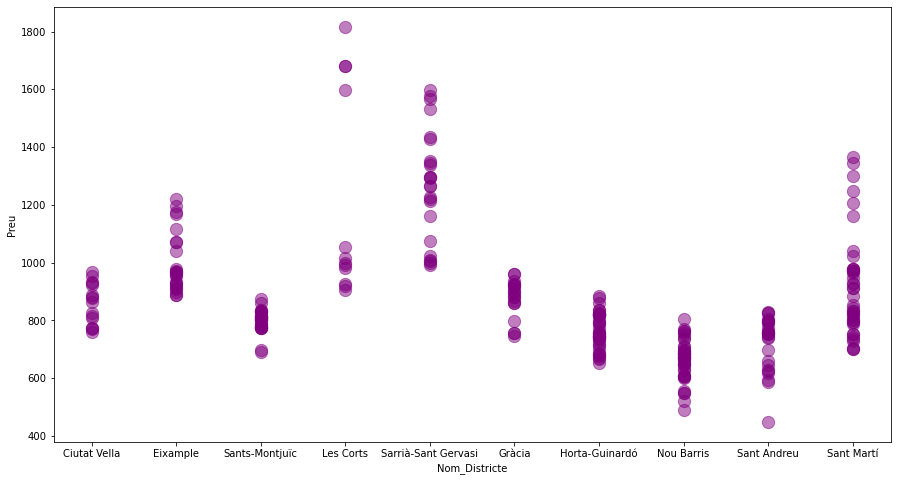

In [12]:
df_LloguerMitjaMensual.plot.scatter(
    x="Nom_Districte", 
    y="Preu", 
    alpha=0.5, 
    figsize=(15,8), 
    c="purple", 
    s=150)
# Exercici 2 exporto gràfic com a imatge
plt.savefig("PreuPerBarri.jpg")

Dues variables numèriques (Any o Trimestre i Preu)

Trimestre
1    869.304478
2    851.910294
3    880.794030
4    884.467647
Name: Preu, dtype: float64


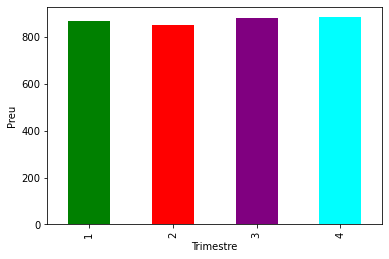

In [13]:
df_groups = df_LloguerMitjaMensual.groupby(['Trimestre'])['Preu'].mean()
print(df_groups)
df_groups.plot.bar(
    color=['green','red','purple','cyan'],
    ylabel='Preu'
)
# Exercici 2 exporto gràfic com a imatge
plt.savefig("PreuMitjaPerTrimestre.jpg")

Tres variables (Barri o Districte, Trimestre i Preu)

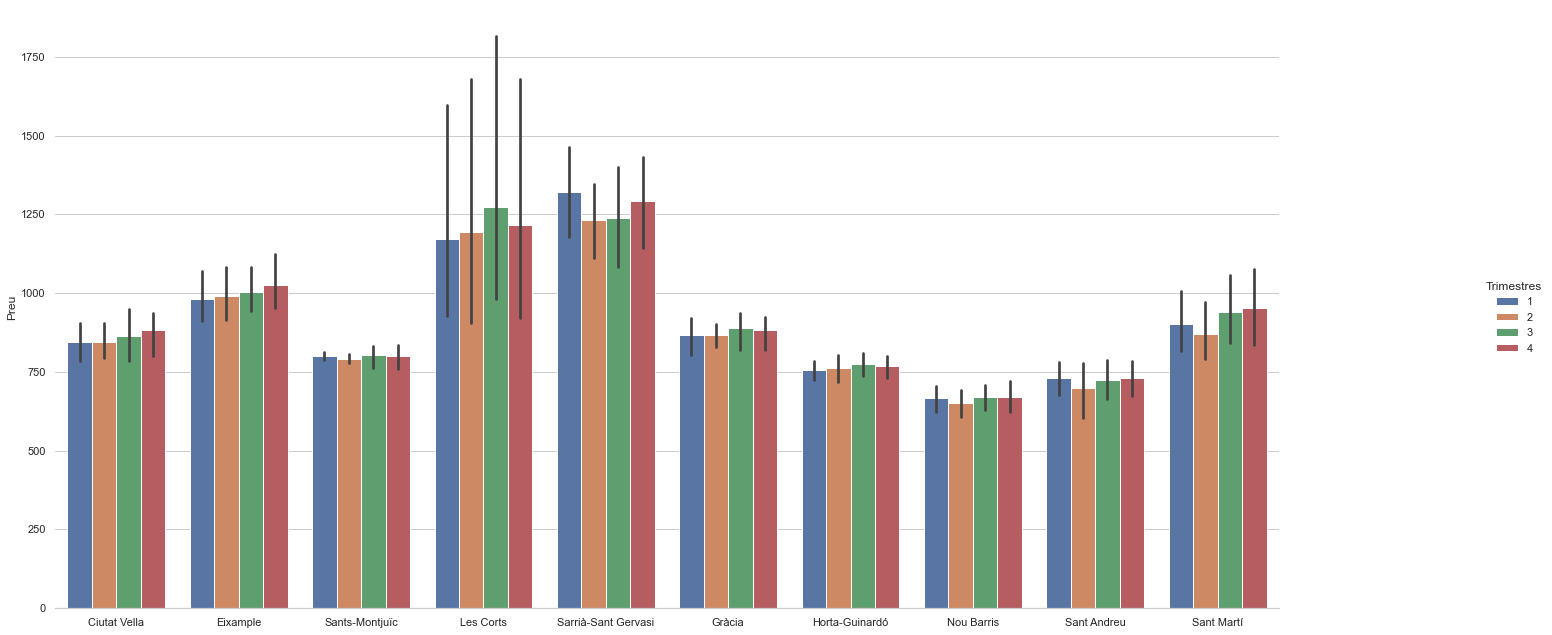

In [14]:
sns.set_theme(style="whitegrid")

TresVariables =sns.catplot(
    data = df_LloguerMitjaMensual, 
    kind = "bar",
    x="Nom_Districte",
    y="Preu",
    hue="Trimestre",
)
TresVariables.fig.set_figwidth(25)
TresVariables.fig.set_figheight(10)
TresVariables.despine(left=True)
TresVariables.set_axis_labels("", "Preu")
TresVariables.legend.set_title("Trimestres")
# Exercici 2 exporto gràfic com a imatge
plt.savefig("TrimestreBarriPreu.jpg")

# Exercici 2
Exporta els gràfics com imatges o com HTML

Dins de cada gràfic he inclós l'ordre per guardar el gràfic com a imatge.

# Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant

C:\Users\imber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


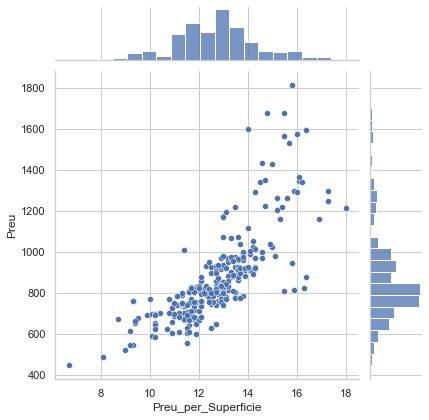

In [15]:
sns.jointplot(df_lloguer_complet['Preu_per_Superficie'],df_lloguer_complet['Preu'])

C:\Users\imber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


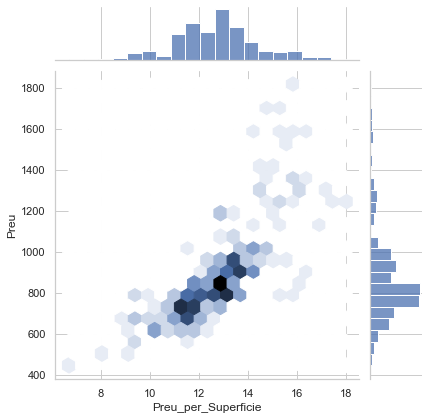

In [16]:
sns.jointplot(df_lloguer_complet['Preu_per_Superficie'], df_lloguer_complet['Preu'], kind ="hex")

He volgut comparar les dues variables de preu, preu per superficie i preu total, esperava una relació positiva entre les dues però és curiós perque al principi la dispersió és menor i a mesura que augmenta la dispersió augmenta.

<AxesSubplot:xlabel='Trimestre', ylabel='Nom_Districte'>

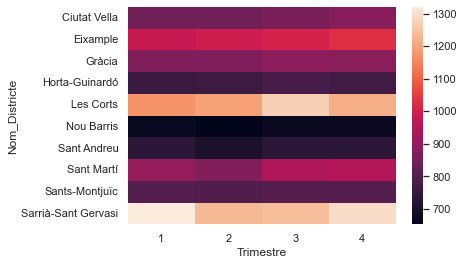

In [17]:
df = df_lloguer_complet.pivot_table(index = "Nom_Districte", columns = "Trimestre", values = "Preu", aggfunc ='mean')
sns.heatmap(df)

<AxesSubplot:xlabel='Trimestre', ylabel='Nom_Districte'>

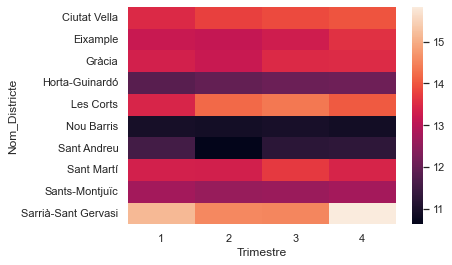

In [18]:
df1 = df_lloguer_complet.pivot_table(index = "Nom_Districte", columns = "Trimestre", values = "Preu_per_Superficie", aggfunc ='mean')
sns.heatmap(df1)

Per altra banda també volia graficar amb mapes de calor les dues variables, i encara que en màxims i mínims el resultat és quasi bé el mateix els resultats intermitjos varien.